<a href="https://colab.research.google.com/github/IvanDiazBravo/Trabajo_Final_Curso_IA_MSF_MECO/blob/main/Proyecto_Fin_Curso_IvanDiazBravo_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Modelo: Random Forest

              precision    recall  f1-score   support

           0       0.25      0.50      0.33        10
           1       0.42      0.33      0.37        15
           2       0.43      0.27      0.33        11
           3       0.57      0.40      0.47        10

    accuracy                           0.37        46
   macro avg       0.42      0.38      0.38        46
weighted avg       0.42      0.37      0.38        46


Modelo: Decision Tree

              precision    recall  f1-score   support

           0       0.29      0.50      0.37        10
           1       0.18      0.13      0.15        15
           2       0.15      0.18      0.17        11
           3       0.40      0.20      0.27        10

    accuracy                           0.24        46
   macro avg       0.26      0.25      0.24        46
weighted avg       0.25      0.24      0.23        46



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:45:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Modelo: Logistic Regression

              precision    recall  f1-score   support

           0       0.13      0.30      0.18        10
           1       0.25      0.13      0.17        15
           2       0.25      0.27      0.26        11
           3       0.67      0.20      0.31        10

    accuracy                           0.22        46
   macro avg       0.32      0.23      0.23        46
weighted avg       0.31      0.22      0.23        46


Modelo: XGBoost

              precision    recall  f1-score   support

           0       0.26      0.50      0.34        10
           1       0.40      0.27      0.32        15
           2       0.40      0.36      0.38        11
           3       0.29      0.20      0.24        10

    accuracy                           0.33        46
   macro avg       0.34      0.33      0.32        46
weighted avg       0.35      0.33      0.32        46



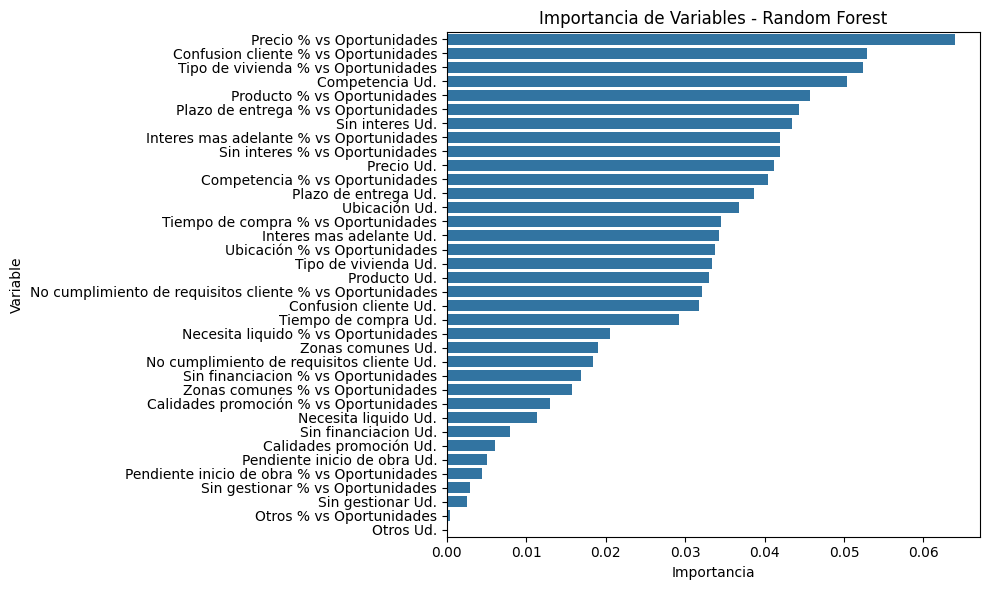


Error: la nueva promoción no tiene el número correcto de características.


In [8]:
# Script para Google Colab - Predicción de Regiones Óptimas para Construcción de Viviendas

# Instalar librerías necesarias (sólo en Colab)
!pip install xgboost openpyxl seaborn --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
# Script para Google Colab - Predicción de Regiones Óptimas para Construcción de Viviendas

# Instalar librerías necesarias (sólo en Colab)
!pip install xgboost openpyxl seaborn --quiet

# Script para Google Colab - Predicción de Regiones Óptimas para Construcción de Viviendas

# Instalar librerías necesarias (sólo en Colab)
!pip install xgboost openpyxl seaborn --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Subir archivo
# uploaded = files.upload() #Commented out as it's colab specific
# file_path = list(uploaded.keys())[0] #Commented out as it's colab specific

# Cargar datos
#print("Cargando datos desde:", file_path) #Commented out as it's colab specific
#df = pd.read_excel(file_path) #Commented out as it's colab specific
# Example for local execution
df = pd.read_excel('data_descartes.xlsx') #Replace 'your_file.xlsx' with your file name

# Selección de columnas
target = 'Territorial'
drop_cols = ['Territorial', 'Delegación', 'Promoción']
features = [col for col in df.columns if col not in drop_cols]

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])
y = df[target]

# Encode the target variable 'y' using LabelEncoder
# This will convert the string labels to numerical representations
encoder = LabelEncoder()
y = encoder.fit_transform(y)


# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados[nombre] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\nModelo: {nombre}\n")
    print(classification_report(y_test, y_pred))

# Importancia de variables con Random Forest
rf = modelos["Random Forest"]
importancias = rf.feature_importances_
indices = np.argsort(importancias)[::-1]
labels = np.array(features)[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias[indices], y=labels)
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Ejemplo de predicción
nueva_promocion = np.array([[10, 0.02, 5, 0.01, 8, 0.04, 1, 0.001, 5, 0.01, 10, 0.02, 15, 0.03, 1, 0.001]])
# Asegúrate de que tenga el mismo número de columnas que X_train
if nueva_promocion.shape[1] == X_train.shape[1]:
    # Predict using the trained model and then decode the prediction
    # back to the original label using encoder.inverse_transform()
    prediccion = encoder.inverse_transform(rf.predict(nueva_promocion))
    print(f"\nPredicción para nueva promoción: {prediccion[0]}")
else:
    print("\nError: la nueva promoción no tiene el número correcto de características.")